## Astro 304 "Galaxies"

### Homework 4 (55 points)

### Top-hat collapse model, stellar mass-halo mass relation from abundance matching and galaxy formation model

### Due, Friday, May 12, 9pm

<b>1. (15 points)</b> Consider a spherical top hat collapse perturbation model discussed in class on Wednesday and described in the <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex07_peaks.ipynb"><tt>ex07_peaks</tt></a> notebook. This model has a simple analytic solution described in the notebook for cosmologies of different $\Omega_{\rm m}$ but $\Omega_\Lambda=0$. $\Omega_\Lambda\ne 0$ case can be done as well, but differential equation needs to be solved numerically and we will not deal with this here. Most of the evolution for real collapsing peaks occurs during epochs when $\Omega_{\rm m}(z)$ is close to unity, so calculations done in cosmologies with  $\Omega_\Lambda=0$ give a fairly good picture of what happens generally. 

Let's assume we consider evolution of a spherical constant-density perturbation of *comoving* radius $R_i=1.5h^{-1}\ \rm Mpc$ starting at the initial redshift of $z_i=100$ that has and overdensity 

$$\delta_i=\frac{ \rho_i } { \bar{\rho}(z_i) } - 1$$
* What are the reasonable choices for $\delta_i$ value at this $z_i$? In particular, for what $\delta_i$ values perturbation would collapse before $z=0$? (1 points)   

<b> Answer a): </b> Since $\delta(a) \sim a = (1+z)^{-1}$ and collapse occurs at critical linear overdensity $ \delta_c \simeq 1.6 $, then $\delta_i = \delta(z = z_i) \gtrsim 1.6/100 = 0.016$ in order for collapse to occur before $ z = 0 $. We can imagine for $\Omega_\Lambda \ne 0$ very late time accelerated expansion will only slightly (factor of a few) increase the required initial overdensity.      

<b> Answer b): </b> If we require that $\Omega_{tot} = 1$, then, unrealistically, $\Omega_{k} = 0.7$. Refer to the following Colossus calculation for the minimum overdensity required for collapse.

* What is the mass associated with the perturbation? Approximately how rare are perturbations of this mass at $z_i=100$ with the amplitude required for collapse before $z=0$? (2 points)   
<b> Answer: </b> $$ M_i = 4/3 \pi R_p(z_i)^3 \bar{\rho}(z_i)(1 + \delta_i)$$
where $R_p(z_i) = a(z_i) R_i $ and $\delta_i << 1 $ s.t. $ M \sim 4 (R_i/100)^3 \bar{\rho}(z_i)  $. Finally $ \bar{\rho}(z_i) = \rho_{0,m}(1 + z)^3 \simeq 10^{11} M_\odot Mpc^{-3} h^2 (100)^3 $ s.t.$$ M_i\sim 10^{12}h^{-1} M_\odot $$


For calculations, you can use colossus code routines, some of which should be handy for the exercise. A few relevant examples are given in the code below, you can find out about other cosmology routines in the colossus <a href="https://bdiemer.bitbucket.io/cosmology_cosmology.html">here</a>. Note that these routines can be called with scalar inputs, like $z$ or $R$, but also vector ones. In the latter case, a vector of relevant quantities will be returned. 

Assuming colossus calculates $\Omega_{tot}$ directly from the specified density fractions, then these calculations with $\Omega_m = 0.3,~ \Omega_\Lambda = 0$ are being done in a spectacularly curved universe. For that reason, I will avoid using colossus for the $\Omega_m = 0.3,~ \Omega_\Lambda = 0$ case as it poorly reflects reality.

In [931]:
import numpy as np
# import Benedikt Diemer's colossus package
from colossus.cosmology import cosmology
# set cosmology parameters
params = {'flat': False, 'H0': 70.0, 'Om0': 0.3, 'relspecies': False, 'OL0': 0, 
          'Ob0': 0.049, 'sigma8': 0.8, 'ns': 0.968, 'print_warnings': False}
cosmo = cosmology.setCosmology('mycosmo', params )

R = 1.5 # comoving in h^{-1} Mpc
z = 100.0
M = cosmo.lagrangianM(R) # returns mass in /h Msun
# compute rms fluctuations on comoving scale R at redshift z
sig = cosmo.sigma(R, z=z, j=0) 
# compute expansion rate H(z) at redshift z in km/s/Mpc
Hz = cosmo.Hz(z)  
# age of the universe at z
tz = cosmo.age(z)
# Omega_m at redshift z
Omz = cosmo.Om(z)
# density of matter at redshift z
rhoz = cosmo.rho_m(z) # in h^2 Msun/kpc^3
# growth factor of the universe normalize to 1.0 at z=0
Dz = cosmo.growthFactor(z)


print("M = %.3e (h^-1 Msun); sigma = %.3f;"%(M, sig))

print("z = {0:.3f}; t = {1:.6} (Gyrs); Omega(z) = {2:.3e}; H(z) = {3:.3e} (km/s/Mpc);"
      "rhoz = {4:.3e} (h^2 Msun/kpc^3)".format(z, tz, Omz, Hz, rhoz))

print("z = {0:.3f}; D_+(z) = {1:.6}".format(z, Dz))

M = 1.177e+12 (h^-1 Msun); sigma = 0.044;
z = 100.000; t = 0.0166 (Gyrs); Omega(z) = 9.774e-01; H(z) = 3.936e+04 (km/s/Mpc);rhoz = 8.577e+07 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0216


In [932]:
1.6*cosmo.growthFactor(z)

0.034669360265315051

* What initial velocity should be assigned to the outermost radial shell $R_i$ of the pertubation? (1 points)   

<b> Answer: </b>

In [933]:
di = 0.032
ri = (R*(1+di)**(-1./3))/(1.+z)
vi = Hz*ri - ri*3.086e+19/3.*(di/(1.+di))*(2./(3.*tz*3.1536e+16))

G  = 6.6743e-8 # cgs
ricgs = ri*3.086e24/cosmo.h #G = 4.302e-3 # pc M_sun^-1 km^2 s^-2
vicgs = vi*1e5/cosmo.h
Mcgs  = M*2.e33/cosmo.h
print('v_i = {0:0.2f} km s^-1'.format(vicgs/1.e5))

v_i = 817.93 km s^-1


* Calculate solution for $R(t)$ and plot $R(t)$ and the expansion factor of the universe $a(t)$ together and compare their evolution over the range of $t$ corresponding to $\eta$ up to $2\pi$. (5 points)   
(i) Do this for perturbation parameters for which the perturbation collapses before $z=0$.    
(ii) How does the evolution change if you change initial radius $R_i$ of the perturbation or initial $\delta_i$?    
(iii) Plot calculations for a fixed $R$ and $\delta_i$ but for two cosmologies (both with the same $H_0$ and $\Omega_\Lambda=0$): $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$.   
(iv) What are the values of $\delta_{\rm lin}$ at $t=t_{\rm coll}$ ($\eta=2\pi$) for $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$ cosmologies? 

M = 1.177e+12 (h^-1 Msun); sigma = 0.044;
z = 100.000; t = 0.0166 (Gyrs); Omega(z) = 9.774e-01; H(z) = 3.936e+04 (km/s/Mpc);rhoz = 8.577e+07 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0216
di = 0.0346693602653
(578.01123916214613, 571.57627311162969)
(0.014683717565005331, 571.57627311162969)
M = 3.923e+12 (h^-1 Msun); sigma = 0.031;
z = 100.000; t = 0.0091 (Gyrs); Omega(z) = 1.000e+00; H(z) = 7.105e+04 (km/s/Mpc);rhoz = 2.859e+08 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0098
di = 0.0158380201903
(1049.7240923294394, 1044.2615209065279)
(0.014773896907032765, 1044.2615209065279)


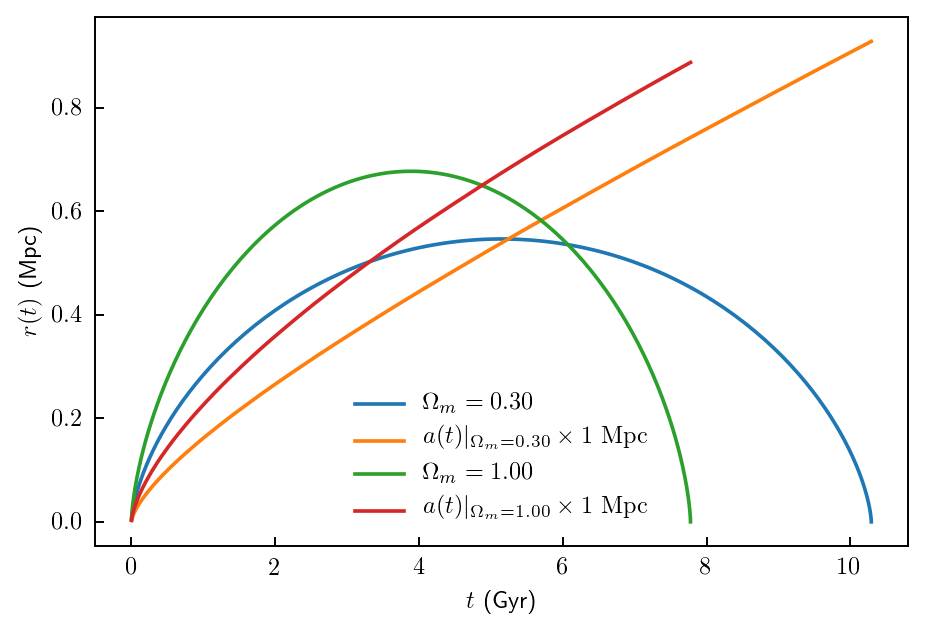

In [934]:
import numpy as np

def radius_calc(R, z, cosmo, dc = 1.6):
    '''
    send cosmology and overdensity parameters to do an orbit calc.
    '''
    #R = 1.5 # comoving in h^{-1} Mpc
    M = cosmo.lagrangianM(R) # returns mass in /h Msun
    # compute rms fluctuations on comoving scale R at redshift z
    sig = cosmo.sigma(R, z=z, j=0) 
    # compute expansion rate H(z) at redshift z in km/s/Mpc
    Hz = cosmo.Hz(z)  
    # age of the universe at z
    tz = cosmo.age(z)
    # Omega_m at redshift z
    Omz = cosmo.Om(z)
    # density of matter at redshift z
    rhoz = cosmo.rho_m(z) # in h^2 Msun/kpc^3
    # growth factor of the universe normalize to 1.0 at z=0
    Dz = cosmo.growthFactor(z)

    print("M = %.3e (h^-1 Msun); sigma = %.3f;"%(M, sig))

    print("z = {0:.3f}; t = {1:.6} (Gyrs); Omega(z) = {2:.3e}; H(z) = {3:.3e} (km/s/Mpc);"
          "rhoz = {4:.3e} (h^2 Msun/kpc^3)".format(z, tz, Omz, Hz, rhoz))

    print("z = {0:.3f}; D_+(z) = {1:.6}".format(z, Dz))
    di = dc*Dz
    print('di = {0}'.format(di))
    ri = (R*(1+di)**(-1./3))/(1.+z)
    vi = Hz*ri - ri*3.086e+19/3.*(di/(1.+di))*(2./(3.*tz*3.1536e+16))
    print(Hz*ri, vi)

    G  = 6.6743e-8 # cgs
    ricgs = ri*3.086e24/cosmo.h #G = 4.302e-3 # pc M_sun^-1 km^2 s^-2
    vicgs = vi*1e5/cosmo.h
    Mcgs  = M*2.e33/cosmo.h
    print(ri, vi)
    E = 0.5*vicgs**2 - G*Mcgs/ricgs
    A = G*Mcgs/np.abs(2.*E)
    B = (A**3/(G*Mcgs))**0.5
    tturn = np.pi*B # Gyr
    return A, B, di

# import Benedikt Diemer's colossus package
from colossus.cosmology import cosmology
# set cosmology parameters

omos = np.array([0.3, 1.0])
for omo in omos:    
    z = 100.
    R = 1.5 # Mpc h^-1
    params = {'flat': False, 'H0': 70.0, 'Om0': omo, 'relspecies': False, 'OL0': 0, 
              'Ob0': 0.049, 'sigma8': 0.8, 'ns': 0.968, 'print_warnings': False}
    cosmo = cosmology.setCosmology('mycosmo', params )
    A, B, _ = radius_calc(R, z, cosmo) # A, B are h-scaled
    eta = np.linspace(2e-1, 2*np.pi, 200)
    r = A*(1   - np.cos(eta))/3.086e24 # convert to Mpc
    t = B*(eta - np.sin(eta))/3.154e16 # conert to Gyr
    a = 1/(1+cosmo.age(t, inverse=True))
    plt.plot(t, r, label = r'\( \Omega_m = {0:0.2f} \)'.format(omo))
    plt.plot(t, a, label = r'\( a(t)|_{{ \Omega_m = {0:0.2f} }} \times '
                            ' 1 \mathrm{{ ~Mpc}} \)'.format(omo))
    plt.xlabel(r'\(t\) (Gyr)')
    plt.ylabel(r'\( r(t) \) (Mpc)')

plt.legend(frameon = False)
plt.show()

Collapse time $t_{coll}$ does not exactly equal $t_{age}$ because $\delta_c = 1.6$ is not an exactly deterministic condition. To test this, I varied slightly the initial perturbation by $\delta_i = D_+(z_i) \delta_c \pm O(-2)$ and saw that $t_{coll} = t_{age}$ was quickly achieved; the sensitivity of $t_{coll}$ to $\delta_i$ is unsurprisingly high.

* Calculate solution $\delta(t)$, where $\delta(t)=\rho(t)/\bar{\rho}_{\rm m}(t)-1$ is the density contrast of the perturbation for the same perturbation as in the previous exercise.  Plot $\delta(t)$ for the top-hat model solution and compare it to the linear evolution $\delta\propto D_+(t)$, where $D_+(t)$ is the linear growth factor. Compare $\delta_{\rm lin}$ - the overdensity predicted by linear evolution with the actual evolution predicted by the top-hat collapse model near the time of collapse, $t_{\rm coll}$ (i.e., $\eta\approx 2\pi$). (5 points)


M = 1.177e+12 (h^-1 Msun); sigma = 0.044;
z = 100.000; t = 0.0166 (Gyrs); Omega(z) = 9.774e-01; H(z) = 3.936e+04 (km/s/Mpc);rhoz = 8.577e+07 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0216
di = 0.0346693602653
(578.01123916214613, 571.57627311162969)
(0.014683717565005331, 571.57627311162969)
M = 3.923e+12 (h^-1 Msun); sigma = 0.031;
z = 100.000; t = 0.0091 (Gyrs); Omega(z) = 1.000e+00; H(z) = 7.105e+04 (km/s/Mpc);rhoz = 2.859e+08 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0098
di = 0.0158380201903
(1049.7240923294394, 1044.2615209065279)
(0.014773896907032765, 1044.2615209065279)


/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in divide
/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 99
/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 99


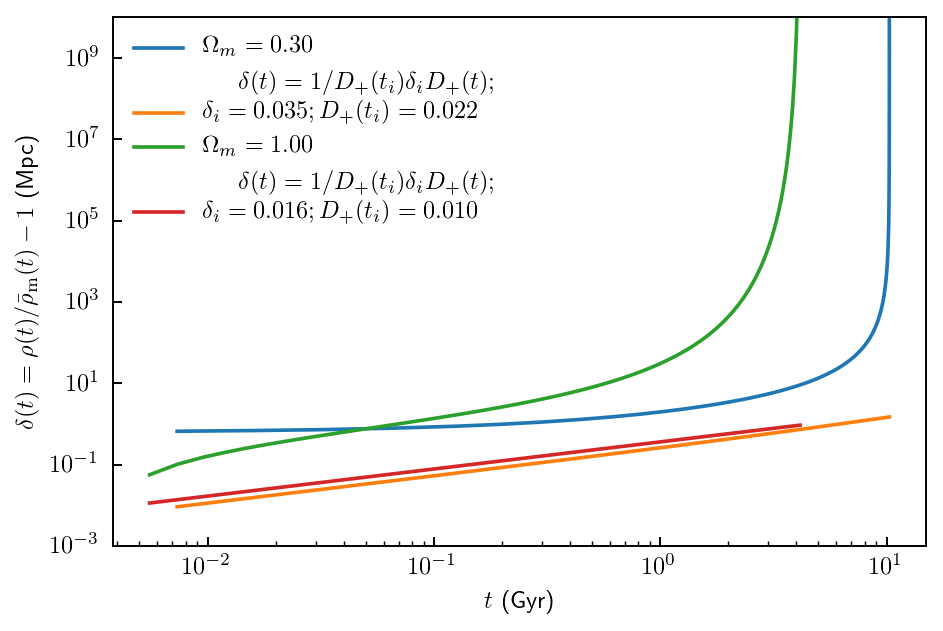

/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide


In [935]:
for omo in omos:    
    zi = 100.
    R = 1.5 # Mpc h^-1
    M = cosmo.lagrangianM(R)
    params = {'flat': False, 'H0': 70.0, 'Om0': omo, 'relspecies': False, 'OL0': 0, 
              'Ob0': 0.049, 'sigma8': 0.8, 'ns': 0.968, 'print_warnings': False}
    cosmo = cosmology.setCosmology('mycosmo', params )
    A, B, di = radius_calc(R, zi, cosmo) # A, B are h-scaled
    eta = np.linspace(3e-1, 2*np.pi, 200)
    r = A*(1   - np.cos(eta))/3.086e24 # convert to Mpc
    t = B*(eta - np.sin(eta))/3.154e16 # conert to Gyr
    z = cosmo.age(t, inverse=True)
    rhomuni = cosmo.rho_m(z) # in h^2 Msun/kpc^3
    r = r*1.e3
    rhopert = M/cosmo.h/(4./3.*np.pi*r**3.)
    delt = rhopert/rhomuni - 1
    delt = delt[delt > di]
    dlin = di*(1/(1+z))
    Dplus = cosmo.growthFactor(zi)
    dlin = dlin[delt > di]/Dplus
    t = t[delt > di]
    plt.plot(t, delt, label = r'\( \Omega_m = {0:0.2f} \)'.format(omo))
    
    plt.plot(t, dlin, label = r'\( \delta(t) = 1/D_+(t_i)\delta_iD_+(t); \\'
                               '\delta_i = {0:0.3f}; D_+(t_i) = {1:0.3f}\)'.format(di, float(Dplus)))
#    plt.plot(t, a, label = r'\( a(t)|_{{ \Omega_m = {0:0.2f} }} \times '
#                            ' 1 \mathrm{{ ~Mpc}} \)'.format(omo))
    plt.xlabel(r'\(t\) (Gyr)')
    plt.ylabel(r'\( \delta(t)=\rho(t)/\bar{\rho}_{\rm m}(t)-1 \) (Mpc)')


plt.xscale('log')
plt.yscale('log')
plt.ylim([0.001, 10**10])
plt.legend(frameon = False)
plt.show()

rhomuni = cosmo.rho_m(z) # in h^2 Msun/kpc^3
rhopert   = M/(4./3.*np.pi*r**3.)





Near the time of collapse $\delta(t)$ is clearly heading towards a singularity quickly as opposed to the linear growth function.

As expected, overdensity in $\Omega_m = 1.00$ universe collapses visibly more quickly than in the $\Omega_m = 0.30 $ universe.

* Assuming that collapsed peak reaches "virial equilibrium" corresponding to $2K+W=0$, where $K$ its "internal" energy and $W$ is the potential energy, compute "virial overdensity" - i.e., $\delta(t=t_{\rm vir}=\delta_{\rm vir}$ - relative to the background density for $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$ cosmologies. Explain the difference between $\delta_{\rm vir}$ for these cosmologies qualitatively. (5 points)


<b>2. (20 points) Evolution of stellar mass function and galaxy-halo connection</b> <br> 

Below you will find a script showing you how to use <tt>colossus</tt> routines to compute halo mass functions in the Sheth et al. approximations (see S 2.4 in the notes) at different redshifts. 

(a) (10 points) Using the composite stellar mass function derived in HW 2, derive $M_*-M_h$ relation using *abundance matching (AM) ansatz*. If you did not get it correctly in your solution, please make a correction using my solution as a guide. It may help to use a smooth version of the function using functional Baldry et al. fit, so that it can be extended to smaller masses. 

The AM ansatz is motivated by the fact that all  galaxies in the CDM scenario are assumed to form in the centers of host dark matter halos. It further assumes that scatter between stellar mass and halo mass is small, so one can derive $M_*-M_{\rm h}$ relation simply by matching stellar mass function and halo mass function at the same $z$:
$$n_{\rm g}(>M_*)=n_{\rm h}(>M_h),$$
i.e., matching cumulative stellar mass and halo mass functions. 

For this exercise to be more accurate we also need to account not only for the "isolated" halos described by the halo mass function expressions, but also for the satellite halos (aka subhalos) which exist inside the isolated host halos. For this, you can use the subhalo fraction as a function of mass calibrated by <a href="http://adsabs.harvard.edu/abs/2013ApJ...770...57B">Behroozi et al. 2013</a> in their equations G5-G7 in Appendix G. To account for satellite halos, multiply the SMT mass functions above by $1+f_{\rm sub}$, where $f_{\rm sub}$ is given by function <tt>fsub</tt> below.

To compute the cumulative functions from differential function you can use one of the integration routines in <a href="http://docs.scipy.org/doc/scipy/reference/integrate.html">scipy.integrate</a>. To solve the above abundance matching numerically, approximate $n_g(>M_*)$ and $n_h(>M_h)$ by <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.UnivariateSpline.html">splines</a> and use the splines to get $M_*-M_h$ and $M_{\rm HI}-M_h$ relations. See P.S. and codes below for additional info and examples of how to spline and integrate. (10 points)

P.S. Note that for integration we need to spline the actual function to be integrated under the integration as a function of variable over which integral performed:
$$N(>M)=\int_M^{\infty}\frac{dn}{dM}dM=\int_{\rm ln M}^\infty \frac{dn}{d\ln M}d\ln M=\int_{\rm log_{10} M}^\infty \frac{dn}{d\log_{10} M}d\log_{10} M,$$
so depending the choice of how to integrate, I should spline $dn/d\log_{10}M$ as a function of $\log_{10} M$, or $dn/d\ln M$ as a function of $\ln M$ etc. Below is a simple example showing how to spline tabulated functions and integrate them. 


/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in log10
/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10


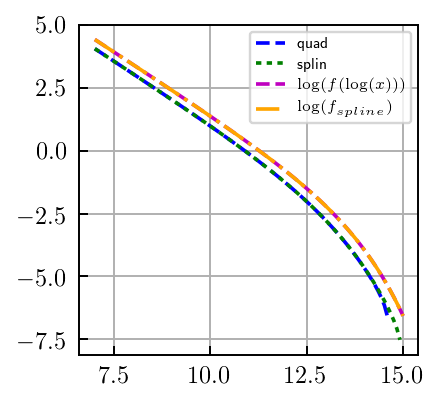

In [936]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
from code.plot_utils import plot_pretty
from scipy.interpolate import UnivariateSpline
from scipy.integrate import quadrature

plot_pretty()

# tabulate an arbitrary but fairly realistic example function
lx = np.linspace(7., 15., 100); x = 10.**lx
y = 2.77e11/x*np.exp(-(x/3.e12)**(1./3.))
ly = np.log10(y)
# construct spline in log-log space, no smoothing
yxsp = UnivariateSpline(lx, ly, s=0.0)

#define function for integration using spline
def fint(lm):
    return 10.**yxsp(lm)

ycum = np.zeros_like(lx); ycum2 = np.zeros_like(lx); ycum3 = np.zeros_like(lx)
# if one splines the function under the integral itself, one can use integral method of the spline
yxsplin = UnivariateSpline(lx,y,s=0.0)
for i, lxd in enumerate(lx):
    ycum[i] = quadrature(yxsplin,lxd,15.5)[0]
    ycum2[i] = yxsplin.integral(lxd,np.inf)
    ycum3[i] = quadrature(yxsp,lxd,15.5)[0]
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
plt.plot(lx,np.log10(ycum), '--', c='b', label = 'quad')
plt.plot(lx,np.log10(ycum2),':', c='g',  label = 'splin')
#plt.plot(lx,ycum3, c = 'black', label = 'orig')
plt.plot(lx,ly,'--', c='m', label = r'\( \log(f(\log(x))) \)')
plt.plot(lx, yxsp(lx),'-.', c = 'orange', label = r'\( \log(f_{spline}) \)')
plt.plot()
plt.legend(fontsize = 6)
plt.grid()
plt.show()

The code illustrates two ways in which integral can be obtained - one by integrating a function defined using spline, and the second using the integral method of spline itself. The latter, however, requires that the function under the integral is splined. This is not always convenient or accurate, but probably will work here. Now here is how you can use splines to abundance match. We define a second function and match it to the first. Note that the first variable in UnivariateSpline must be monotonic, so the order of arrays is reversed before this is done.

/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


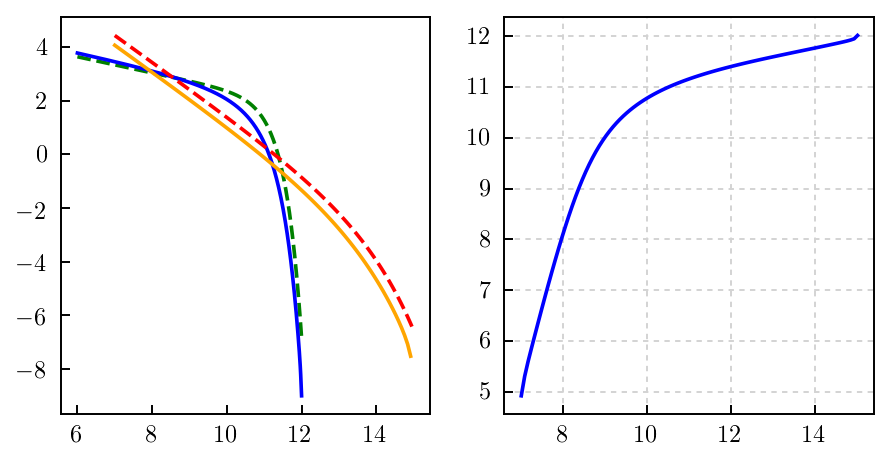

In [937]:
# tabulate an arbitrary but fairly realistic example function
lx2 = np.linspace(6., 12., 500); x2 = 10.**lx2
z = 1.e-6*2.77e11/x2**0.3*np.exp(-(x2/5.e10))
lz = np.log10(z)

zcum = np.zeros_like(lx2); 
# if one splines the function under the integral itself, one can use integral method of the spline
zxsplin = UnivariateSpline(lx2,z,s=0.0)

for i, lxd in enumerate(lx2):
    zcum[i] = zxsplin.integral(lxd,np.inf)

zcum[zcum<=0] = 1.e-9
# note that the first variable in the spline must be increasing, so we need to invert zcum
zcumr = zcum[::-1]
lx2r = lx2[::-1]
matchspl = UnivariateSpline(zcumr, lx2r, s=0.0)

lxmatch = matchspl(ycum2)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(lx2, lz, '--', c = 'green')
ax[0].plot(lx2, np.log10(zcum), c = 'blue')
ax[0].plot(lx, ly, '--', c = 'red')
ax[0].plot(lx, np.log10(ycum2), c = 'orange')

ax[1].plot(lx, lxmatch,  c='b')

ax[1].grid(linestyle='dotted', c='lightgray')
plt.show()

In [938]:
len(ycum2)

100

here are the routines computing stellar mass function from Leja et al. (2015)

Here is code to compute halo mass functions using the collossus routines

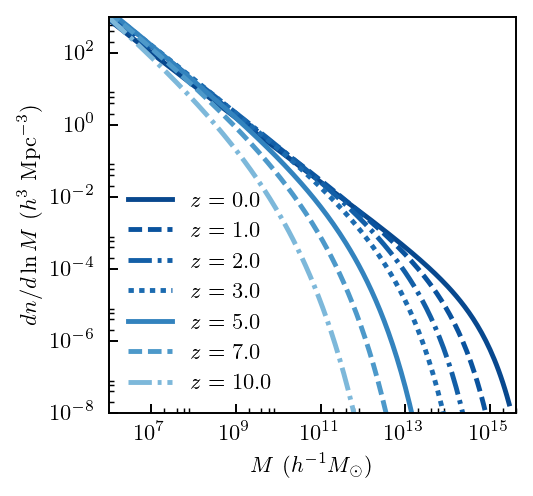

In [939]:
from colossus.cosmology import cosmology
import matplotlib.cm as cm
import matplotlib.colors as colors

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology	
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
#cosmo.interpolation = False

z0=0.0
z = np.array([0.0, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

fig = plt.figure(figsize = (3,3))
from code.plot_utils import plot_pretty
plot_pretty()

# grid of halo masses in /h Msun
lmh = np.arange(6.,15.5,0.05)
mh = np.power(10.,lmh)
# compute Lagrangian radius corresponding to perturbation of mass mh in /h Mpc
rh = cosmo.lagrangianR(mh)
# compute rms fluctuation sigma(R) using default Eisenstein & Hu 1998 power spectrum and tophat filter
sig = cosmo.sigma(rh,z0)
# and its logarithmic derivative dlog(sigma)/dlogR
dsdr = cosmo.sigma(rh, z0, derivative='True')
# dln(sigma)/dlnR -> dln(sigma)/dlnM, M = (4*pi/3) rho_mean * R^3
dsdm = dsdr / 3.0

#
#  SMT01 mass function parameters
#

q_smt = 0.3; A_smt = 0.322; a_smt = 0.707

nu = cosmo.peakHeight(mh, 0.0)
nup = np.sqrt(a_smt)*nu

fig = plt.figure(figsize = (3,3))
plt.xlabel(r'$M\ (h^{-1} M_{\odot})$')
plt.ylabel(r'$dn/d\ln M\ (h^3\ \rm Mpc^{-3})$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.e6, 4.e15)
plt.ylim(1.e-8,1.e3)

cnorm  = colors.Normalize(vmin=0, vmax=22)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Blues)

z = np.array([0.0, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])
lstyles = ['-','--','-.',':','-','--','-.']
nc = np.zeros_like(z)
for i, zd in enumerate(z): nc[i] = np.int(30.*(20.0-zd)/30.0)
color = scalarmap.to_rgba(nc)

for i,zd in enumerate(z):
    nu = cosmo.peakHeight(mh, zd)
    nup = np.sqrt(a_smt)*nu
    dsdmz = dsdm*cosmo.growthFactor(zd)
    nsmt2 = A_smt*np.sqrt(2.0/np.pi)*cosmo.Om0*2.77e11/mh*(1.0+1./nup**(2.*q_smt))*nup*np.abs(dsdm)*np.exp(-0.5*nup**2)

    plt.plot(mh,nsmt2,c=color[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%zd)
    
plt.legend(frameon=False, loc='lower left', fontsize=9)
#plt.grid()
plt.show()

Integrating nsmt2 w.r.t. $\mathrm{d}\ln(M)$

In [940]:
z

array([  0.,   1.,   2.,   3.,   5.,   7.,  10.])

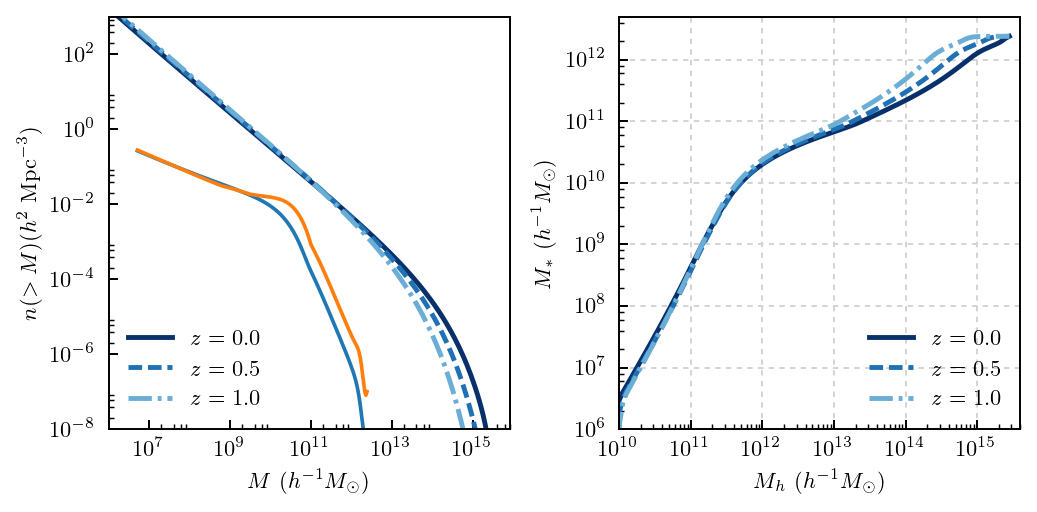

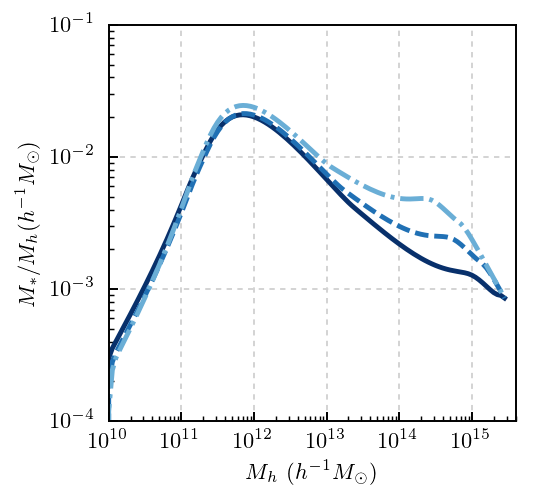

In [941]:
########################################################################

#     SUBSECTION 3.1. Stellar Mass Function and Plot Settings

########################################################################


fig, axs = plt.subplots(1, 2, figsize = (6,3))
axs[0].set_xlabel(r'$M\ (h^{-1} M_{\odot})$')
axs[0].set_ylabel(r'$n(>M) (h^2\ \rm Mpc^{-3})$')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(1.e6, 8.e15)
axs[0].set_ylim(1.e-8,1.e3)

m, phi = np.loadtxt('comp_MF.dat', unpack = True, skiprows=1)
lm = np.log10(m)
j=0
nSMspli = UnivariateSpline(lm, phi, s=0.0)
nSMcum = np.zeros_like(lm)
for j, dlm in enumerate(lm):
    if j == len(lm)-1:
        nSMcum[j] = 0
    else:
        nSMcum[j] = nSMspli.integral(dlm, np.inf)
axs[0].plot(m, nSMcum)
axs[0].plot(m, phi)

axs[1].set_xlabel(r'$M_h\ (h^{-1} M_{\odot})$')
axs[1].set_ylabel(r'$M_{{*}}\ (h^{-1} M_{\odot})$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlim(1.e10, 4.e15)
axs[1].set_ylim(1.e6, 5.e12)
axs[1].grid(linestyle='dotted', c='lightgray')


def fsub(mh, z):
    """
    subhalo fraction calibration from the Appendix G of Behroozi et al. 2013
    as a function of Mpeak - eqs G9-10
    input: mh = halo mass in Msun
           z  = redshift
    """
    aexp = 1.0/(1.0+z)
    aexp2 = aexp*aexp; aexp3 = aexp2*aexp; aexp4 = aexp3*aexp
    Ca = -1.91 + 6.23*aexp - 15.07*aexp2 + 15.02*aexp3  - 5.29*aexp4
    Mcutoff = 10.66 + 15.93*aexp - 21.39*aexp2 + 18.20*aexp3 - 8.21*aexp4
    return 10.**Ca*np.log10(10.**Mcutoff/mh)


########################################################################

#     SUBSECTION 3.2. Compute and Plot M_s - M_h relation

########################################################################


### Make matching spline
mrev = m[::-1]
nSMrev = nSMcum[::-1]
matchspl = UnivariateSpline(nSMrev, mrev, s=0.0)

cnorm  = colors.Normalize(vmin=18, vmax=22)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Blues)

z = np.linspace(0., 1.0, 3)
#lstyles = ['-','--','-.',':','-','--','-.']
nc = np.zeros_like(z)
for i, zd in enumerate(z): nc[i] = np.int(33.0*(20.0-zd)/30.0)
color = scalarmap.to_rgba(nc)

for i,zd in enumerate(z):
    nu = cosmo.peakHeight(mh, zd)
    nup = np.sqrt(a_smt)*nu
    dsdmz = dsdm*cosmo.growthFactor(zd)
    nsmt2 = A_smt*np.sqrt(2.0/np.pi)*cosmo.Om0*2.77e11/mh*(1.0+1./nup**(2.*q_smt))*nup*np.abs(dsdm)*np.exp(-0.5*nup**2)
    nsmt2 = (1 + fsub(mh, zd))*nsmt2
    lnMh = np.log(mh)
    nsmt2log10 = nsmt2/np.log10(np.e)
    nsmt2spli = UnivariateSpline(lmh, nsmt2log10, s=0.0)
    ncum = np.zeros_like(lmh)
    for j, dlmh in enumerate(lmh):
        if j == len(lmh)-1:
            ncum[j] = 0
        else:
            ncum[j] = nsmt2spli.integral(dlmh, np.inf)
    axs[0].plot(mh, ncum, c=color[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%zd)
    
    ### Calculate the Ms - Mh relation

    #ncum[ncum <= 0] = 1e-20
    mmatch = matchspl(ncum)
    axs[1].plot(mh, mmatch, c=color[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%zd)
    
axs[0].legend(frameon=False, loc='lower left', fontsize=9)
axs[1].legend(frameon=False, loc='lower right', fontsize=9)

#plt.grid()
plt.tight_layout()

plt.show()


########################################################################

#     SUBSECTION 3.3. M_s/M-h - M_h relation

########################################################################


f, ax = plt.subplots(figsize = (3,3))
ax.set_xlabel(r'$M_h\ (h^{-1} M_{\odot})$')
ax.set_ylabel(r'$M_{{*}}/M_h (h^{-1} M_{\odot})$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.e10, 4.e15)
ax.set_ylim(1e-4, 0.1)
ax.grid(linestyle='dotted', c='lightgray')
for i,zd in enumerate(z):
    nu = cosmo.peakHeight(mh, zd)
    nup = np.sqrt(a_smt)*nu
    dsdmz = dsdm*cosmo.growthFactor(zd)
    nsmt2 = A_smt*np.sqrt(2.0/np.pi)*cosmo.Om0*2.77e11/mh*(1.0+1./nup**(2.*q_smt))*nup*np.abs(dsdm)*np.exp(-0.5*nup**2)
    nsmt2 = (1 + fsub(mh, zd))*nsmt2
    lnMh = np.log(mh)
    nsmt2log10 = nsmt2/np.log10(np.e)
    nsmt2spli = UnivariateSpline(lmh, nsmt2log10, s=0.0)
    ncum = np.zeros_like(lmh)
    for j, dlmh in enumerate(lmh):
        if j == len(lmh)-1:
            ncum[j] = 0
        else:
            ncum[j] = nsmt2spli.integral(dlmh, np.inf)    
    ### Calculate the Ms - Mh relation
    mmatch = matchspl(ncum)
    ax.plot(mh, mmatch/mh, c=color[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%zd)
f.show()

Agrees well with Behroozi et al. (2013) up to $ M_h \sim 10^{14} $. Their slope is much flatter there, while in this plot the $M_*-M_h$ relation continues to increase, finally flattening at higher masses $M_h \sim 10^{15} $.

I have intentionally plotted only the halo mass function for $0.0 < z < 1.0$ since the GAMA + Meert composite function consisted of galaxies all in this redshift range. Following this reasonably. The most reasonable $M_*-M_h$ relation would be the $z = 0.0$ curve for low stellar masses, then continuously increasing $z$ towards $z = 1.0$ for the highest masses. This is because the low mass end of the MF is biased towards low-z galaxies and vice versa for the high mass end.

(a) (10 points) Plot the evolution of the observed stellar mass function described by equations in S 2 of <a href="http://adsabs.harvard.edu/abs/2015ApJ...798..115L">Leja et al. 2015</a>,  for $0<z<2.5$ and single Schechter fit from the CANDELS and CANDELS-S surveys at $z>3$, which is implemented in the script below as function <tt>nmstz</tt>. Comment on differences and similarities to the evolution of halo mass function shown below. <br> (3 points) Repeat the abundance matching exercise at these higher redshifts using the Leja et al. stellar mass functions. How does the $M_*-M_h$ relation evolve? (7 points)
You can compare your results with results presented in Figure 7 of <a href="http://adsabs.harvard.edu/abs/2013ApJ...770...57B">Behroozi et al. 2013.</a> Discuss inferences for the process of galaxy formation that you can glean from this plot. 

12.59 < 12.59
12.59 < 12.59
12.59 < 12.59
10.5150449171 < 12.2691983972
[167]
-4.18850160424 < 13.0658279518
[154]


/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:132: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:134: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


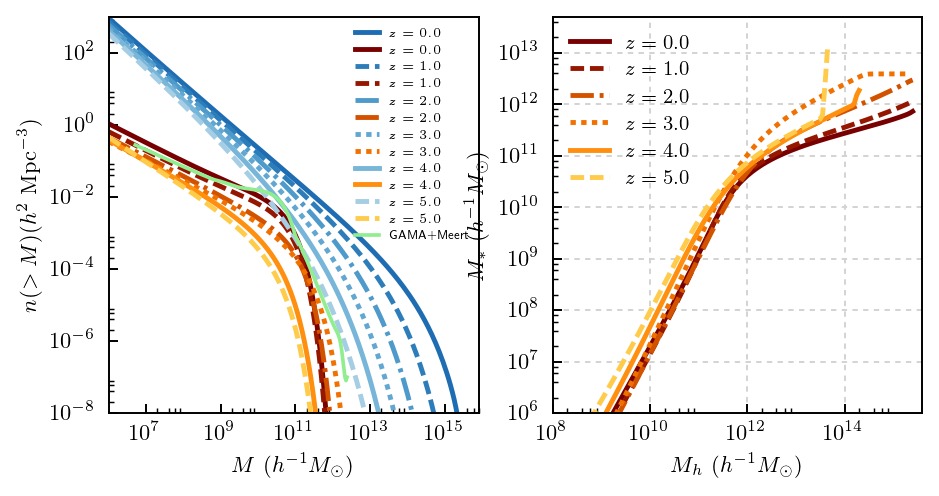

In [942]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.interpolate import UnivariateSpline
import matplotlib.cm as cm
import matplotlib.colors as colors

def nmstz(ms, z):
    """
    compute analytic double Schechter representation of the observed stellar mass function as a function
    of redshift using calibration of Leja et al. 2015, 798, 115 (see eqs in their S 2)
    note that this calibration is for 3<z<0 - I checked it gives grossly incorrect results at z>3
    
    input: ms - array of stellar masses
            z - redshift
    output: dn/dlog10(M*) in dex^-1 Mpc^-3
    """
    if z <= 3.0:
        z2 = z * z; lms = np.log10(ms)
        lphi1 = -2.46 + 0.07*z - 0.28*z2 
        lphi2 = -3.11 - 0.18*z - 0.03*z2
        lmst  = 10.72 - 0.13*z + 0.11*z2
        mst = np.power(10.,lmst); mus = ms/mst
        a1 = -0.39; a2 = -1.53
        nmstz = np.log(10.)*np.exp(-mus)*(mus)*(10.**lphi1*mus**a1+10.**lphi2*mus**a2)
    else:
        """
        high-z SMF estimates from CANDELS and S-CANDELS from the talk by Song 
        http://www.astrodeep.eu/wp-content/uploads/2015/02/MSong.sesto_.Jan2015.pdf
        """
        z_h     = [4.0, 5.0, 6.0, 7.0]
        lmst_z  = [10.68, 10.58, 10.22, 10.45]
        ah_z    = [-1.59, -1.68, -1.89, -1.93]
        lphi_z = [-3.77, -3.99, -4.34, -4.94]

        lmst  = UnivariateSpline(z_h, lmst_z)
        ahz   = UnivariateSpline(z_h, ah_z)
        lphiz = UnivariateSpline(z_h, lphi_z)
        a = ahz(z); mst = np.power(10., lmst(z))
        phiz = np.power(10.,lphiz(z))
        mus = ms/mst
        nmstz = np.log(10.)*phiz*np.exp(-mus)*(mus)**(a + 1.0)

    return nmstz



lms = np.arange(6., 12.6, 0.01)
ms = np.power(10., lms)

fig, axs = plt.subplots(1,2, figsize = (6,3))
plt.xlabel(r'$M\ (h^{-1} M_{\odot})$')
plt.ylabel(r'$dn/d\ln M\ (h^3\ \rm Mpc^{-3})$')
axs[0].set_xlabel(r'$M\ (h^{-1} M_{\odot})$')
axs[0].set_ylabel(r'$n(>M) (h^2\ \rm Mpc^{-3})$')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(1.e6, 8.e15)
axs[0].set_ylim(1.e-8,1.e3)

axs[1].set_xlabel(r'$M_h\ (h^{-1} M_{\odot})$')
axs[1].set_ylabel(r'$M_{{*}}\ (h^{-1} M_{\odot})$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlim(1.e8, 4.e15)
axs[1].set_ylim(1.e6, 5.e13)
axs[1].grid(linestyle='dotted', c='lightgray')

cnorm  = colors.Normalize(vmin=0, vmax=17)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.afmhot_r)

zs = np.linspace(0., 5.0, 6)
lstyles = ['-','--','-.',':','-','--','-.']
nc = np.zeros_like(zs)
for i, zd in enumerate(zs): nc[i] = np.int(40.0*(10.0-zd)/30.0)
color1 = scalarmap.to_rgba(nc)

cnorm  = colors.Normalize(vmin=0, vmax=17)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Blues)

nc = np.zeros_like(zs)
for i, zd in enumerate(zs): nc[i] = np.int(40.*(10.0-zd)/30.0)
color2 = scalarmap.to_rgba(nc)

for i, z in enumerate(zs):
    ### DM halo mass function. Calculate dn/dlnM_h via SMT (2002), then integrate
    ### to get cumulative mass function.
    lmh = np.arange(6.,15.5,0.05)
    mh = np.power(10.,lmh)
    nu = cosmo.peakHeight(mh, z)
    nup = np.sqrt(a_smt)*nu
    dsdmz = dsdm*cosmo.growthFactor(z)
    dnlnSMTh = A_smt*np.sqrt(2.0/np.pi)*cosmo.Om0*2.77e11/mh*(1.0+1./nup**(2.*q_smt))*nup*np.abs(dsdmz)*np.exp(-0.5*nup**2)
#    dnlnSMTh = (1 + fsub(mh, z))*dnlnSMTh
    phiSMTh = dnlnSMTh/np.log10(np.e)
    phiSMThspl = UnivariateSpline(lmh, phiSMTh, s=0.0)
    nSMTh = np.zeros_like(lmh)
    for j, dlmh in enumerate(lmh):
        nSMTh[j] = phiSMThspl.integral(dlmh, np.inf)
    axs[0].plot(mh, nSMTh, c=color2[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%z)
    
    ### Stellar mass function. Calculate dn/dlnM_s via Leja+ (2015), then integrate
    ### to get cumulative mass function.
    dnlnLeja15 = nmstz(ms, z)
    phiLeja15 = dnlnLeja15/np.log10(np.e)
    phiLeja15sp = UnivariateSpline(lms, phiLeja15, s=0.0)
    nLeja15 = np.zeros_like(lms)
    for j, dlms in enumerate(lms):
        nLeja15[j] = phiLeja15sp.integral(dlms, np.inf)
    axs[0].plot(ms, nLeja15, c=color1[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%z)
    
    ### Make matching spline
    mrev = ms[::-1]
    logmrev = np.log10(mrev)
    nLeja15rev = nLeja15[::-1]
    matchspl = UnivariateSpline(nLeja15rev, logmrev, s=0.0)
  
    ### Calculate the Ms - Mh relation
    
    mmatch = matchspl(nSMTh)
    for j, e in enumerate(mmatch):
        stop = -1
        if j > 0:
            if e <= mmatch[j - 1]:
                print('{0} < {1}'.format(e, mmatch[j-1]))
                stop = np.where(mmatch == e)[0]
                if len(stop) == 1:
                    print(stop)
                    break
                else:
                    stop = stop[0]
    mmatch = mmatch[:stop]
    #mmatch = mmatch[mmatch >=-10]
    mh = mh[:stop]
    #mh = mh[mmatch >=-10]
    axs[1].plot(mh, 10**mmatch, c=color1[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%z)

    f.show()
    
axs[0].plot(m, phi, label = 'GAMA+Meert', color = 'lightgreen')
axs[0].legend(frameon=False, loc='upper right', fontsize=5)
axs[1].legend(frameon=False, loc='upper left', fontsize=8)
fig.show()

<i> (left) </i> There seems to be a cap on stellar mass growth at $ 10^{12} M_\odot $; something that stops star formation once a certain stellar mass is reached? DM halo mass seems to grow indefinitely. I'd be interested to see the gas mass to see if it more closely follows the DM halo mass. Also clear is a build up of galaxies at the elbow in increasing time. Further indication of evolution towards, and stopping at, $M_{*} \sim 10^{12} M_\odot $. Additionally, with increasing $z$ the mass functions seem to be approaching $\Omega_b/\Omega_{dm}$.    

<i> (right) </i> Before the elbow at $M_h \sim 5 \times 10^{11}$, the $M_* - M_h$ relation is shifted up with increasing $z$ implying that $\dot{M_*} < \dot{M_h} $ for low mass haloes. For masses greater than the elbow, the redshift evolution suggests that for high mass halos $ 0.0 < z < 3.0$ the halo mass is growing faster than the stellar mass. This was already seen for halo masses $M_h \lt M_{elbow}$. We can imagine that heating of the gas in the halo (e.g. shocks) would puff up the baryonic matter to the point of significantly suppressing star formation by slowing down gas accretion. Finally, for $z > 3.0$, $ \dot{M_*}/\dot{M_h} $ is actually increasing from high $z$ towards the peak of the high mass $M_*$ at $z \sim 3$. This makes logical sense considering that star formation peaks around $z \sim 2$, so we are probably seeing different stellar feedback processes finally beginning to suppress star formation in these higher mass halos (in which it is naturally more difficult to halt baryon collapse).

<b>3. Galaxy evolution model. (15 points)</b> To get appreciation for processes that shape galaxy properties, we will build 
a fairly simple galaxy formation model. Many elements will be based on the model described  in S 2.1-2.2 of <a href="http://adsabs.harvard.edu/abs/2013MNRAS.433.1910F">Feldmann (2013)</a> (some details can also be found in S 2 of <a href="http://adsabs.harvard.edu/abs/2012ApJ...753...16K">Krumholz & Dekel 2012</a>). It is essentially a system of ODEs with specified sink and source terms specified by the model. The ODEs can be integrated using one of the python integrators. The code used below uses <a href="http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html">scipy.integrate.odeint</a><br><br>

We will start with the bare-bones model framework that I provide in the python code <tt>galaxy_model.py</tt> in <tt>code/</tt> subdirectory. The code uses object-oriented features of python (namely class and methods), which are convenient tools
for this purpose. If you are not familiar with classes, you can read some intro material <a href="https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/">here</a>, for example (we will only use the most basic features and you can see everything that's needed in my code, except for inheritance, which we can discuss later).

Specifically, in <tt>galaxy_model.py</tt> a bare-bones galaxy model is implemented as a python class, which is convenient in this case because it allows to collect all the relevant quantities and functions and encapsulate them in a single object. This then makes it easy to create collections of model galaxies with a given set of parameters, or to initialize a model at any instance in time given the key parameters and use class methods to compute quantities of interest (like SFR) easily without the need to store them. 

Below you can see example of how model galaxies are instantiated and used. 

The model implements realistic evolution of halo mass, but simply assumes that baryons with universal fraction accrete onto galaxy instantly and then get converted into stars on a constant 2.5 Gyr time scale.

In [943]:
import numpy as np
import code.galaxy_model as gm
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

In [944]:
from scipy.integrate import odeint

def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gm.model_galaxy(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

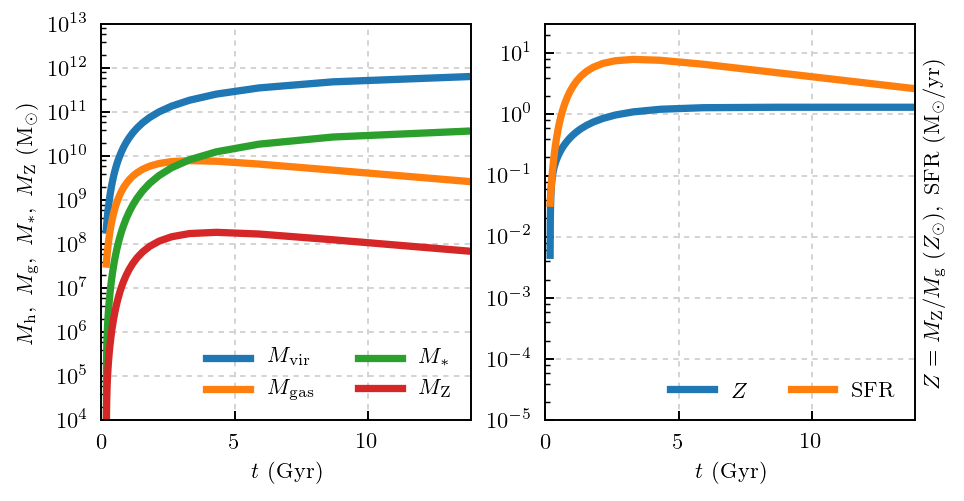

In [945]:
sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)

#
# plot
#
tu = cosmo.age(0.0) # the age of the Universe

fig, ax = plt.subplots(1,2, figsize=(6,3))    
ax[0].set_xlabel(r'$t\ \rm (Gyr)$'); ax[0].set_ylabel(r'$M_{\rm h},\ M_{\rm g},\ M_{*},\ M_{\rm Z}\ (\rm M_\odot)$')
ax[0].set_xlim(0.,tu); ax[0].set_ylim(1.e4,1.e13)
ax[0].set_yscale('log')
ax[0].plot(t_output, Mhout, lw = 3.0, label=r'$M_{\rm vir}$')
ax[0].plot(t_output, Mgout, lw = 3.0, label=r'$M_{\rm gas}$')
ax[0].plot(t_output, Msout, lw = 3.0, label=r'$M_{\rm *}$')
ax[0].plot(t_output, MZout, lw = 3.0, label=r'$M_{\rm Z}$')

ax[0].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[0].grid(linestyle='dotted', c='lightgray')
    
# plot SFR and Z(t)
ax[1].set_xlabel(r'$t\ \rm (Gyr)$'); ax[1].set_ylabel(r'$Z= M_{\rm Z}/M_{\rm g}\ (Z_\odot),\rm\ SFR\ (M_\odot/yr)$')
ax[1].set_xlim(0.,tu); ax[1].set_ylim(1.e-5,30.)
ax[1].set_yscale('log')
ax[1].yaxis.set_label_position('right')


ax[1].plot(t_output, MZout/Mgout/0.02, lw = 3.0, label=r'$Z$')
SFR = np.zeros_like(t_output); 

for i, td in enumerate(t_output):
    ge = gm.model_galaxy(t = td, Mh = Mhout[i], Mg = Mgout[i], Ms = Msout[i], MZ = MZout[i], 
                         sfrmodel = sfrmodel, cosmo = cosmo)
    SFR[i] = ge.SFR(td)*1.e-9;

ax[1].plot(t_output,SFR, lw = 3.0, label=r'$\rm SFR$')
ax[1].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[1].grid(linestyle='dotted', c='lightgray')
plt.show()


Briefly discuss the main features of the evolution of total halo mass, $M_{\rm vir}$, and other parameters? Interpret the evolution of total mass, $M_{\rm vir}$ in terms of peak collapse processes? (5 points)

<i>left</i>:   
(i) $M_Z$ must be decreasing because the dilution of metals resulting from accretion of un-enriched primordial gas must be faster than conversion of $e\Delta M_*$ into $\Delta M_Z$, where $e$ is some characteristic efficiency for metal enrichment by stars.    
(ii) $M_*$ increases as $M_gas$ decreases. The exact conversion efficiency used in the code is unknown, but this trend is as expected.

<i>right</i>:   
(i) $Z$ increases with SFR until it saturates at a constant value. This would imply the code uses a constant metallicity enrichment fraction resulting from stellar burning, as discussed above.    
(ii) SFR peaks at t$\sim 3$ Gyr, or $z \sim 2$. Could be due to gas accretion slowing down due to baryon heating in the DM halo, while the gas already contained in the galaxy is used up.

Now let's run a grid of model galaxies in halos of different masses and plot the stellar mass-halo mass.     


In [946]:
from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gm.model_galaxy(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')


evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


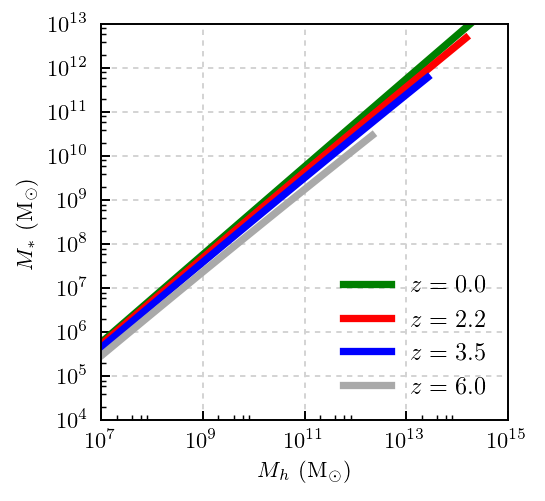

In [947]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=3.0, label=r'$z=%1.1f$'%zplot)
            
plt.legend(frameon=False,loc='lower right', fontsize=10)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()


Please comment and interpret the resulting stellar mass-halo mass relation in the plot above. For example, why does it have the shape it does and why it evolves in the way you see? How does it compare to your results for this relation from abundance matching in 2? (3 points). 

(i) The slope below $M_h < 2 \times 10^{11} M_\odot$ is approx. an order of magnitude flatter than in the above abundance matching.    
(ii) There is no "turnover" mass.   
(iii) The slope above $M_h > 10^{12} M_\odot $ is two orders of magnitude steeper than in the above M_s - M_h relations.   
(iv) There is no sharp cutoff at $ M_{*} \sim 10^{12} M_\odot $.   


One way to alter the $M_*-M_{\rm h}$ relation is to shut off gas accretion onto a halo. For small halos this can happen when intergalactic gas temperature is increased by the re-ionization at $z\approx 6-10$. This results in a characteristic halo mass scale below which gas accretion is suppressed that evolves with redshift. This mass is calibrated by numerical simulations and the approximate expression can be found in S 2.4.1 of the notes. Inherit my <tt>model_galaxy</tt> class into a new class (e.g., <tt>my_model_galaxy</tt>) and implement such cutoff mass in the galaxy formation model in the <tt>Mg_in</tt> function (you can do this by modifying external <tt>fg_in</tt> function. Replot the above plot of $M_*-M_h$ and discuss the effects of the gas suppression, if any, on the relation (7 points).

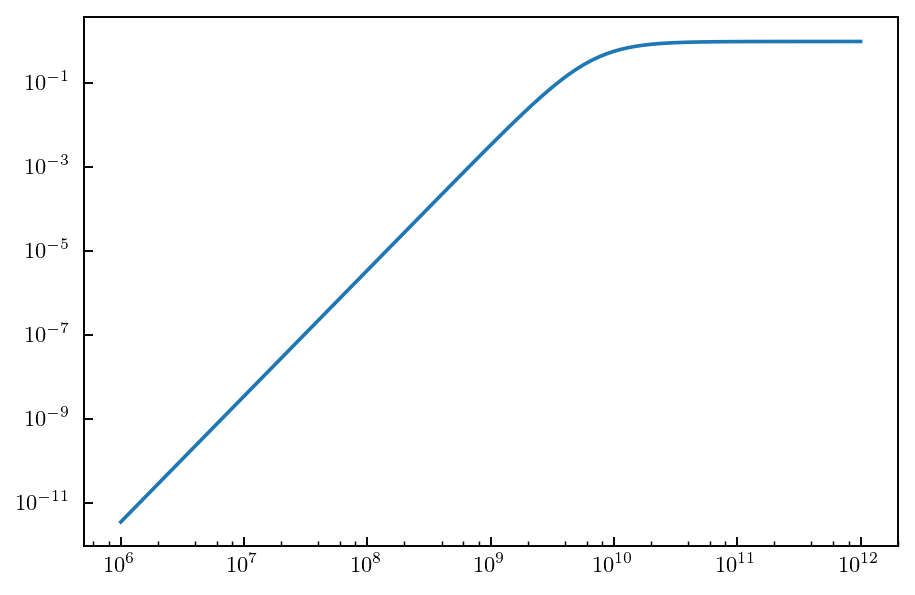

In [948]:
def fg_in(Mh, z, h):
    '''
    Gnedin (2000) formalism. Hoeft et al. (2006); Okamoto, Gao, and Theuns (2008)
    calibration for reionization decreasing the baryon fraction in DM halos.
    '''
    alpha = 2.
    if z < 9.:
        Mc = 6.e9*np.exp(-0.63*z)/h
    if z > 9.:
        Mc = 3.e5/h
    fb = (1. + (2.**((alpha/3.)) - 1.)*(Mh/Mc)**(-alpha))**(-3./alpha)
    if np.any(fb <= 1e-30) or np.any(np.isnan(fb)):
        if type(fb) == float:
            fb = 1e-30
        if type(fb) == np.ndarray:
            fb[fb <= 1e-30] = 1e-30
            fb[fb == np.nan] = 1e-30
    return fb

mtest = np.logspace(6,12,100)
plt.plot(mtest, fg_in(mtest, 0., 0.7))
plt.xscale('log')
plt.yscale('log')
plt.show()
class local_gal(gm.model_galaxy):
    '''
    Modification of base galaxy model to account for reionization heating of
    baryons suppressing accretion in small DM halos.
    '''
    def Mg_in(self, t):
        '''
        hi I am here.
        '''
        fg = fg_in(self.Mh, self.z, self.cosmo.h)
        dummy = self.fbuni*self.eps_in(t)*fg*self.dMhdt(self.Mh,t)
        return dummy
    def Ms_in(self, t):
        '''
        Accreted stellar mass as fraction of accreted DM mass. Was originally set to
        be the remaining fraction of baryonic mass not accounted for in Mg_in. This
        was determined to be highly unphysical with the reionization correction
        made to fb_in. If gas accretion rate goes to 0, this does *not* imply that
        stellar mass accretion rate must approach (f_b,uni)*dM_h/dt. Baryonic accretion
        should instead go to 0 along with the halting of gas accretion.
        '''
        fg = 1.0
        dummy = self.fbuni*(1.0 - fg)*self.dMhdt(self.Mh,t)
        return dummy

In [949]:
from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = local_gal(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')



evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


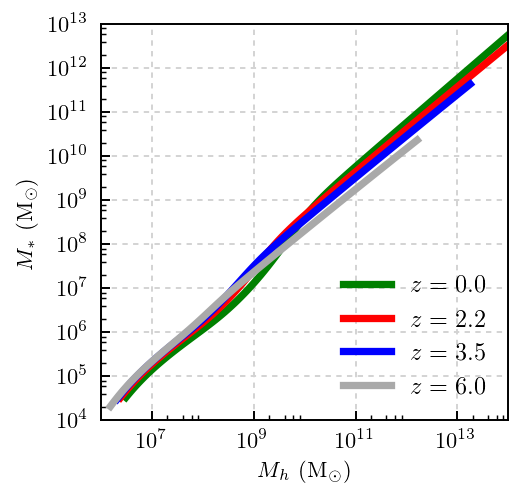

In [950]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e6,1.e14)
plt.ylim(1.e4,1.e13)
plt.xscale('log')
plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    # take care of numerical errors when calculating Ms for high Mh
    for j, e in enumerate(Msz):
        stop = -1
        if j > 0:
            if e <= Msz[j - 1]:
                print('{0} < {1}'.format(e, Msz[j-1]))
                stop = np.where(Msz == e)[0]
                print(stop)
                break
    Msz = Msz[:stop]
    Mhz = Mhz[:stop]
    print('')
    plt.plot(Mhz, Msz, c=zcolors[i], lw=3.0, label=r'$z=%1.1f$'%zplot)
            
plt.legend(frameon=False,loc='lower right', fontsize=10)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()

The halo mass to stellar mass ratio begins to increase for $M_h < 10^9 M_\odot, z = 0$. As expected, the effect shifts to larger halo masses in time simply because $\dot{M_*} \rightarrow 0$ (due to reionization heating) while $M_h$ stays positively constant.

In [951]:
stop

-1